<a href="https://colab.research.google.com/github/rajtg19/MyLearning/blob/main/NLP_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("/content/tweets.csv", encoding = 'ISO-8859-1')
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
def gen_word_freq(txt):
  words = list()

  for w in txt.split():
    words.extend(w)

  return pd.Series(words).value_counts()
  
  

In [6]:
def plot_wordcloud(word_freq):
  import matplotlib.pyplot as plt
  from wordcloud import WordCloud
  #Generate word cloud
  wc = WordCloud(width=600, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
  plt.figure(figsize=(12, 8))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

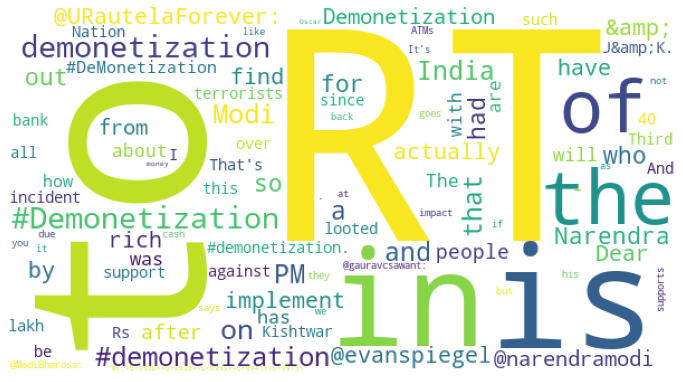

In [7]:
word_freq = gen_word_freq(tweets.text.str)
plot_wordcloud(word_freq)

In [13]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[&?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

#Remove stop words
def remove_stopwords(word_freq_lst):
    from wordcloud import STOPWORDS
    return word_freq_lst.drop(labels=STOPWORDS, errors='ignore')

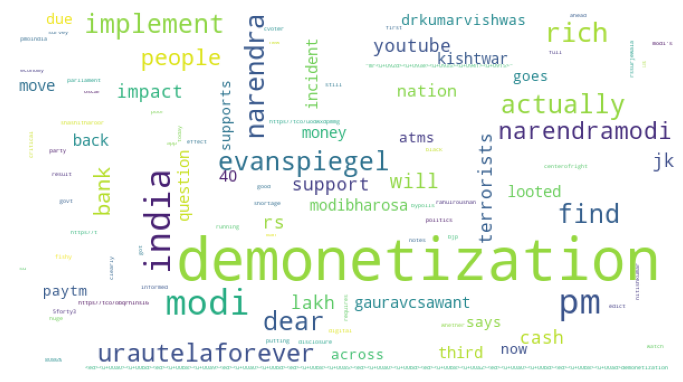

In [14]:
#Clean dataset

tweets['cleaned_text'] = tweets.text.apply(lambda x: clean_text(x))
word_freq = gen_word_freq(tweets.cleaned_text.str)
word_freq = remove_stopwords(word_freq)
plot_wordcloud(word_freq)